In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
stock_df = pd.read_csv("data/stock_price.csv")

## Understanding Dataset

In [3]:
stock_df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [4]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB


- date is object, convert to datetime

In [5]:
stock_df.isnull().sum()

symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

- Very small number of value are missing we will remove them

In [6]:
stock_df.duplicated().sum()

np.int64(0)

In [7]:
stock_df.dropna(inplace=True)

In [8]:
stock_df['date'] = pd.to_datetime(stock_df['date'])

In [9]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 497461 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   symbol  497461 non-null  object        
 1   date    497461 non-null  datetime64[ns]
 2   open    497461 non-null  float64       
 3   high    497461 non-null  float64       
 4   low     497461 non-null  float64       
 5   close   497461 non-null  float64       
 6   volume  497461 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 30.4+ MB


In [10]:
stock_df = stock_df.set_index('date')

In [11]:
stock_df.head()

,symbol,open,high,low,close,volume
date,,,,,,
2014-01-02,AAL,25.0700,25.8200,25.0600,25.3600,8998943
2014-01-02,AAPL,79.3828,79.5756,78.8601,79.0185,58791957
2014-01-02,AAP,110.3600,111.8800,109.2900,109.7400,542711
2014-01-02,ABBV,52.1200,52.3300,51.5200,51.9800,4569061
2014-01-02,ABC,70.1100,70.2300,69.4800,69.8900,1148391


In [12]:
print(stock_df.index.min())
print(stock_df.index.max())

2014-01-02 00:00:00
2017-12-29 00:00:00


In [13]:
stock_df.loc['2014-01-01':'2014-12-31']

,symbol,open,high,low,close,volume
date,,,,,,
2014-01-02,AAL,25.0700,25.8200,25.0600,25.3600,8998943
2014-01-02,AAPL,79.3828,79.5756,78.8601,79.0185,58791957
2014-01-02,AAP,110.3600,111.8800,109.2900,109.7400,542711
2014-01-02,ABBV,52.1200,52.3300,51.5200,51.9800,4569061
2014-01-02,ABC,70.1100,70.2300,69.4800,69.8900,1148391
...,...,...,...,...,...,...
2014-12-31,XYL,38.6500,38.6500,38.0400,38.0700,466877
2014-12-31,YUM,73.4200,73.7700,72.7800,72.8500,1539425
2014-12-31,ZBH,115.0600,115.7500,113.3900,113.4200,694720


so by keeping date as the index we can slice through with date as shown above

In [14]:
for val in stock_df.columns:
    print("Column",val,'has',stock_df[val].nunique(),'unique values')

Column symbol has 505 unique values
Column open has 44160 unique values
Column high has 71986 unique values
Column low has 72344 unique values
Column close has 45342 unique values
Column volume has 475819 unique values


Calculated return daily basis

In [15]:
stock_df['daily_pt'] = stock_df.groupby('symbol')['close'].diff().fillna(0)
stock_df['daily_%'] = stock_df.groupby('symbol')['close'].pct_change().fillna(0)

In [16]:
stock_df[stock_df['symbol'] == 'AAPL']

,symbol,open,high,low,close,volume,daily_pt,daily_%
date,,,,,,,,
2014-01-02,AAPL,79.3828,79.5756,78.8601,79.0185,58791957,0.0000,0.000000
2014-01-03,AAPL,78.9799,79.0999,77.2042,77.2828,98303870,-1.7357,-0.021966
2014-01-06,AAPL,76.7785,78.1142,76.2285,77.7042,103359151,0.4214,0.005453
2014-01-07,AAPL,77.7599,77.9942,76.8464,77.1481,79432766,-0.5561,-0.007157
2014-01-08,AAPL,76.9728,77.9371,76.9556,77.6371,64686685,0.4890,0.006338
...,...,...,...,...,...,...,...,...
2017-12-22,AAPL,174.6800,175.4240,174.5000,175.0100,16349444,0.0000,0.000000
2017-12-26,AAPL,170.8000,171.4700,169.6790,170.5700,33185536,-4.4400,-0.025370
2017-12-27,AAPL,170.1000,170.7800,169.7100,170.6000,21498213,0.0300,0.000176


Something common is calculating moving averages which can be in 50,100,200 days. <br>
Moving Average is indicator if there is upward or downward trend

In [17]:
stock_df['ma_100'] = stock_df.groupby('symbol')['close'].transform(lambda x:x.rolling(100).mean())
stock_df['ma_200'] = stock_df.groupby('symbol')['close'].transform(lambda x:x.rolling(200).mean())
stock_df['volatile'] = stock_df.groupby('symbol')['close'].transform(lambda x:x.rolling(20).std())

In [18]:
stock_df.head()

,symbol,open,high,low,close,volume,daily_pt,daily_%,ma_100,ma_200,volatile
date,,,,,,,,,,,
2014-01-02,AAL,25.0700,25.8200,25.0600,25.3600,8998943,0.0,0.0,NaN,NaN,NaN
2014-01-02,AAPL,79.3828,79.5756,78.8601,79.0185,58791957,0.0,0.0,NaN,NaN,NaN
2014-01-02,AAP,110.3600,111.8800,109.2900,109.7400,542711,0.0,0.0,NaN,NaN,NaN
2014-01-02,ABBV,52.1200,52.3300,51.5200,51.9800,4569061,0.0,0.0,NaN,NaN,NaN
2014-01-02,ABC,70.1100,70.2300,69.4800,69.8900,1148391,0.0,0.0,NaN,NaN,NaN


## EDA

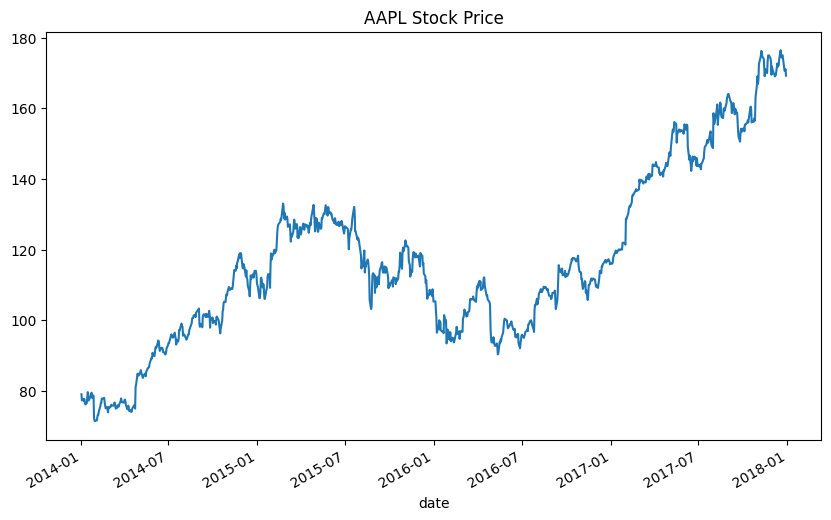

In [19]:
aapl_stock = stock_df[stock_df['symbol'] == 'AAPL']['close']
aapl_stock.plot(figsize=(10, 6), title="AAPL Stock Price")
plt.show()

So the AAPL stock price are at its peak

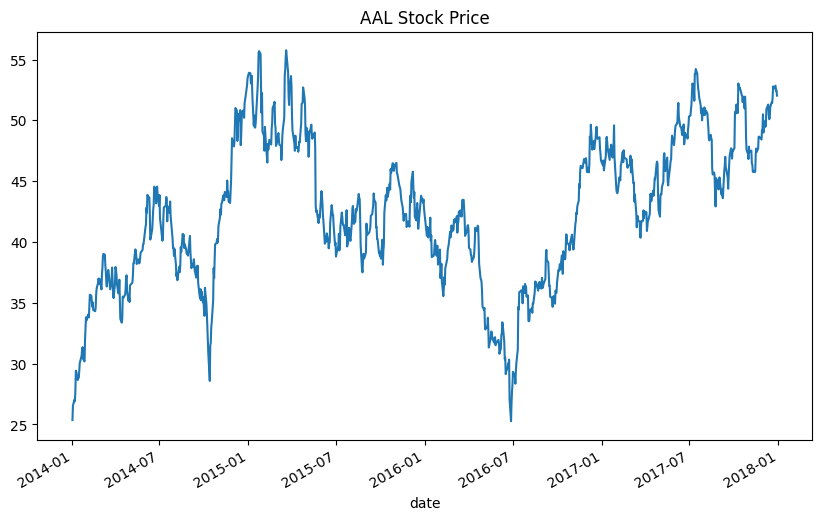

In [20]:
aapl_stock = stock_df[stock_df['symbol'] == 'AAL']['close']
aapl_stock.plot(figsize=(10, 6), title="AAL Stock Price")
plt.show()

There have been sharp down but the stock is recovering to its peak

<Axes: >

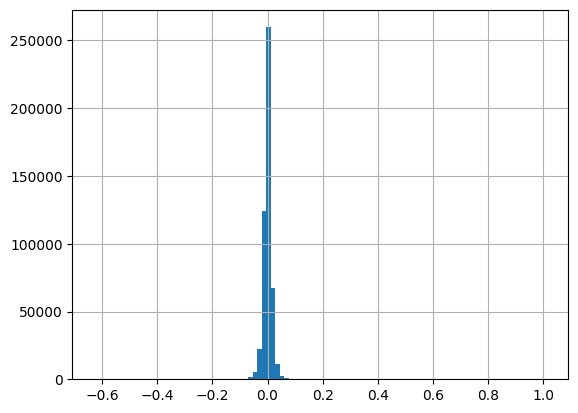

In [21]:
stock_df['daily_%'].hist(bins=100)

This shows high concentration of % within the 0 and occasionally higher % values

<Axes: >

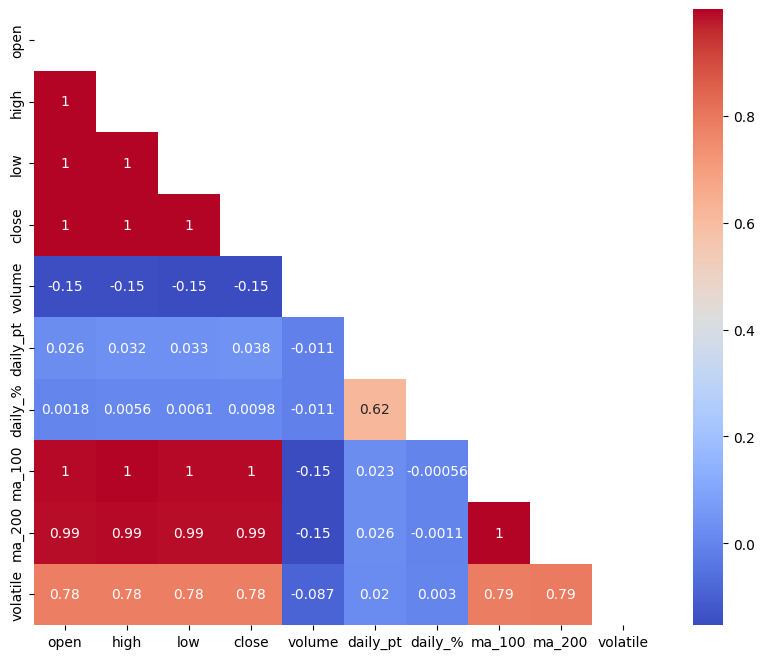

In [22]:
num_corr = stock_df.corr(numeric_only=True)

mask = np.triu(np.ones_like(num_corr, dtype=bool))
plt.figure(figsize=(10,8))
sns.heatmap(num_corr, annot=True, cmap='coolwarm', mask=mask)

In [23]:
stock_df.corr(numeric_only=True)

,open,high,low,close,volume,daily_pt,daily_%,ma_100,ma_200,volatile
open,1.000000,0.999941,0.999928,0.999876,-0.148724,0.025864,0.001798,0.995422,0.990918,0.781190
high,0.999941,1.000000,0.999905,0.999938,-0.148345,0.031563,0.005607,0.995535,0.991109,0.782479
low,0.999928,0.999905,1.000000,0.999941,-0.149285,0.032922,0.006124,0.995236,0.990693,0.779734
close,0.999876,0.999938,0.999941,1.000000,-0.148839,0.038356,0.009813,0.995351,0.990872,0.781138
volume,-0.148724,-0.148345,-0.149285,-0.148839,1.000000,-0.011357,-0.010628,-0.151201,-0.153335,-0.086687
daily_pt,0.025864,0.031563,0.032922,0.038356,-0.011357,1.000000,0.617796,0.022562,0.025799,0.019697
daily_%,0.001798,0.005607,0.006124,0.009813,-0.010628,0.617796,1.000000,-0.000555,-0.001096,0.003007
ma_100,0.995422,0.995535,0.995236,0.995351,-0.151201,0.022562,-0.000555,1.000000,0.997868,0.786174
ma_200,0.990918,0.991109,0.990693,0.990872,-0.153335,0.025799,-0.001096,0.997868,1.000000,0.789620
volatile,0.781190,0.782479,0.779734,0.781138,-0.086687,0.019697,0.003007,0.786174,0.789620,1.000000


In [24]:
model_df = stock_df.drop(columns=['daily_pt', 'daily_%', 'ma_100', 'ma_200', 'volatile'])

In [25]:
model_df.head()

,symbol,open,high,low,close,volume
date,,,,,,
2014-01-02,AAL,25.0700,25.8200,25.0600,25.3600,8998943
2014-01-02,AAPL,79.3828,79.5756,78.8601,79.0185,58791957
2014-01-02,AAP,110.3600,111.8800,109.2900,109.7400,542711
2014-01-02,ABBV,52.1200,52.3300,51.5200,51.9800,4569061
2014-01-02,ABC,70.1100,70.2300,69.4800,69.8900,1148391


<Axes: >

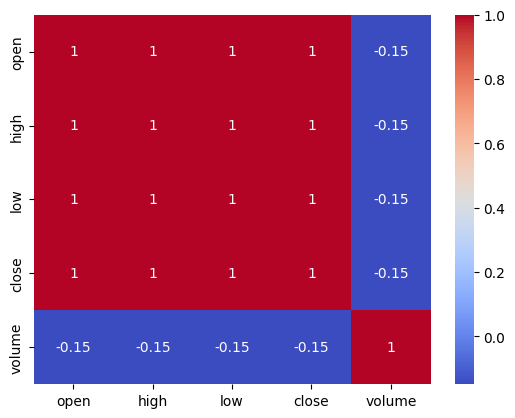

In [26]:
model_corr = model_df.corr(numeric_only=True)
sns.heatmap(model_corr, annot=True, cmap='coolwarm')

This also makes seens as all our columns depend upon each other and changes because of each other. Like suppose if the high goes up the low will decrease, similarly the close of today change the open of tomorrow

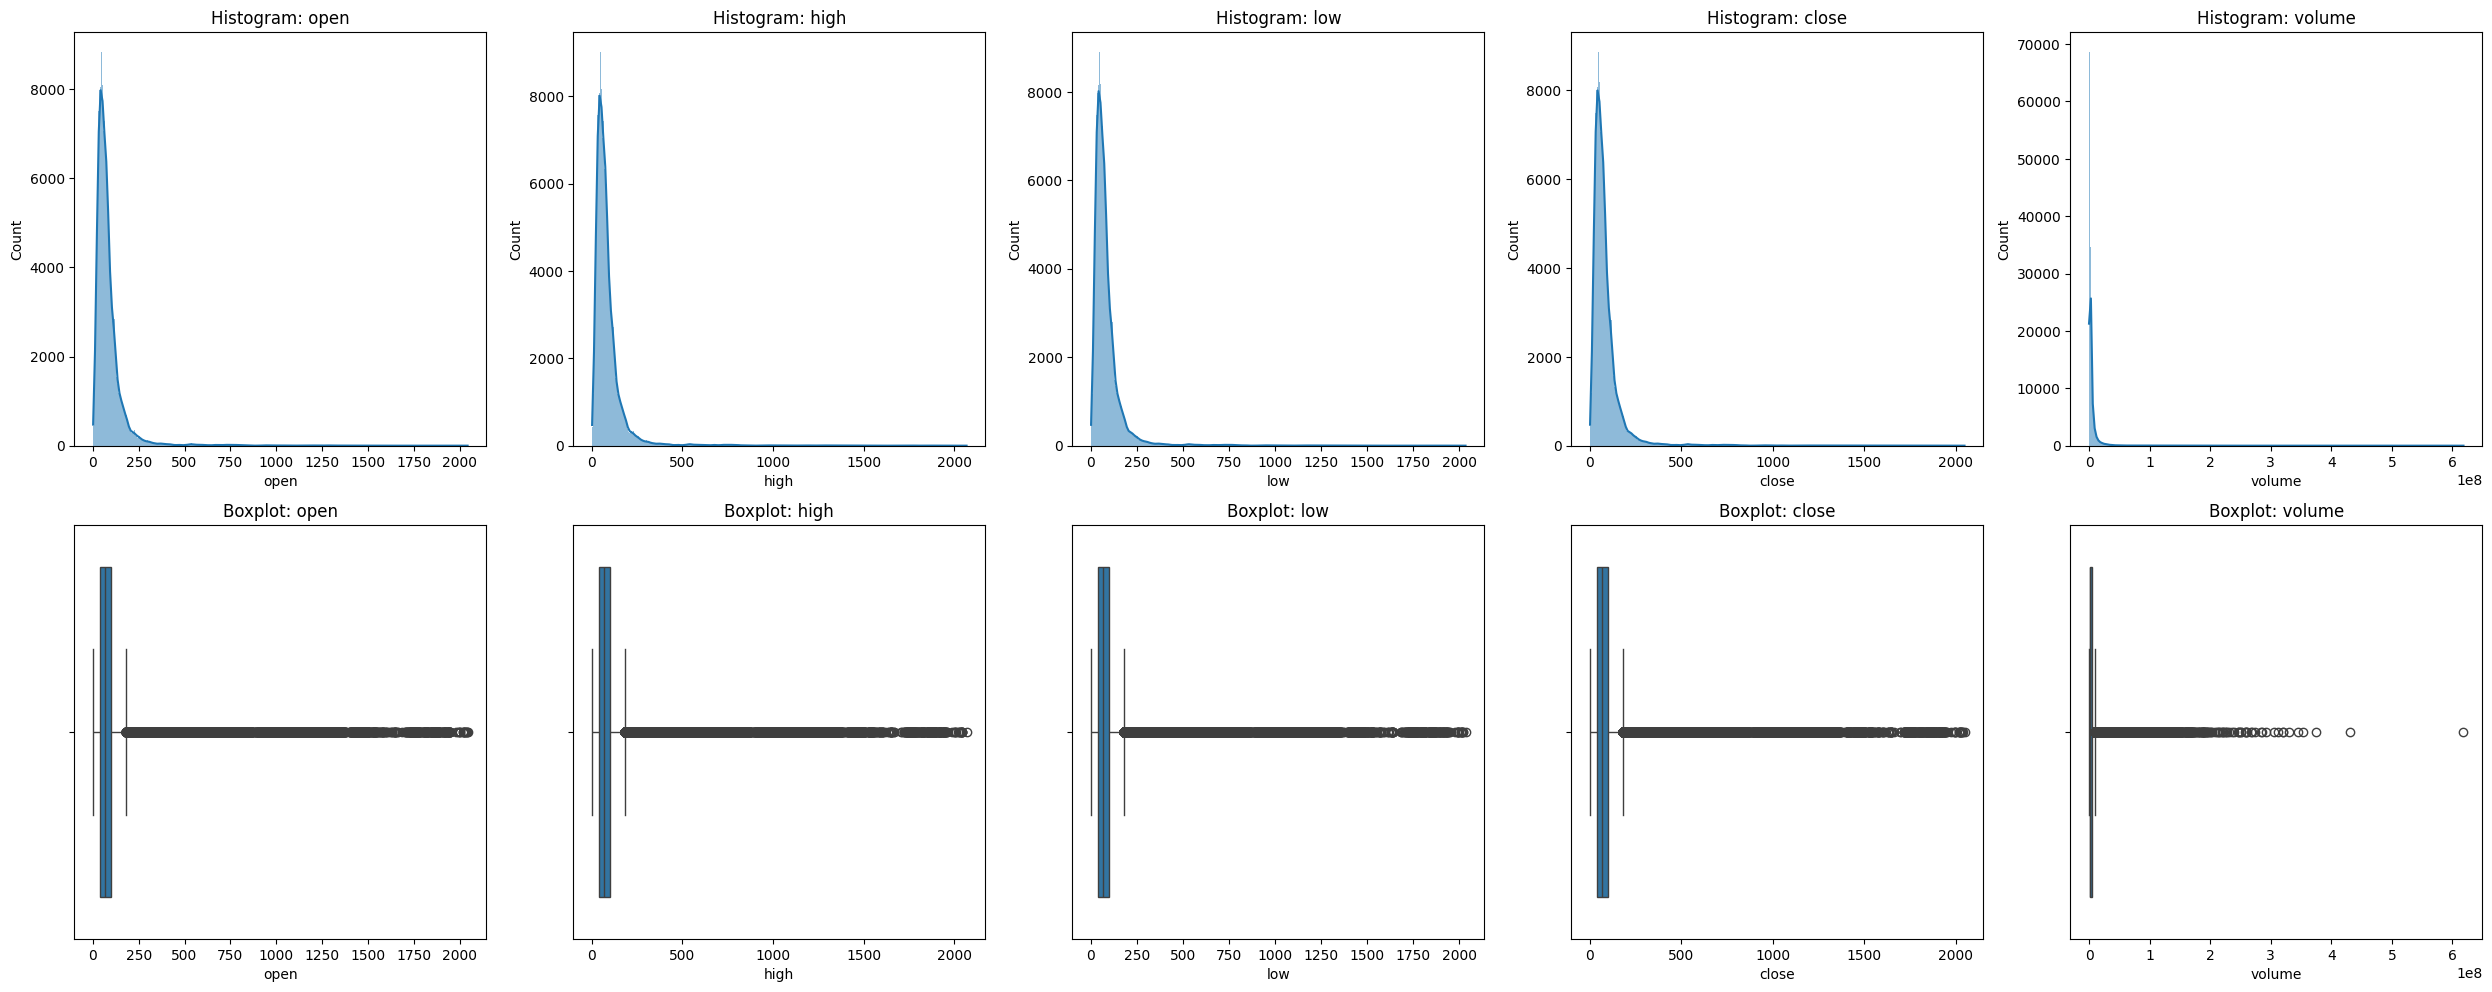

In [27]:
num_plot = model_df.drop(columns=['symbol'])
fig, axes = plt.subplots(2, len(num_plot.columns), figsize=(25, 10))

axes = axes.flatten()

for i, col in enumerate(num_plot.columns):

    sns.histplot(num_plot[col], ax=axes[i], kde=True, edgecolor=None)
    axes[i].set_title(f"Histogram: {col}")

for i, col in enumerate(num_plot.columns):

    sns.boxplot(x=num_plot[col], ax=axes[i + len(num_plot.columns)])
    axes[i + len(num_plot.columns)].set_title(f"Boxplot: {col}")

plt.tight_layout(pad=1.0)
plt.show()


- Stocks cannt be uniformly distributed they can change from minute to minute. So its normal for such plots to show.
- Applying boxcox or other technique maynt be ideal as it can compress the outliers to move towards normal but then we will loss the actual data which we want to predict

In [28]:
model_df.head()

,symbol,open,high,low,close,volume
date,,,,,,
2014-01-02,AAL,25.0700,25.8200,25.0600,25.3600,8998943
2014-01-02,AAPL,79.3828,79.5756,78.8601,79.0185,58791957
2014-01-02,AAP,110.3600,111.8800,109.2900,109.7400,542711
2014-01-02,ABBV,52.1200,52.3300,51.5200,51.9800,4569061
2014-01-02,ABC,70.1100,70.2300,69.4800,69.8900,1148391


In [29]:
stock_aapl = model_df[model_df['symbol'] == 'AAPL'].copy()
stock_aapl = stock_aapl.drop(columns=['symbol'])

In [30]:
model_df.shape

(497461, 6)

In [31]:
stock_aapl.shape

(1007, 5)

So what we are trying to do get a model up just for a single symbol and use that model for prediction. We have around 500+ unique symbol applying ohe wont make any sense. This we can focus on a single symbol.

In [32]:
stock_aapl.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1007 entries, 2014-01-02 to 2017-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   open    1007 non-null   float64
 1   high    1007 non-null   float64
 2   low     1007 non-null   float64
 3   close   1007 non-null   float64
 4   volume  1007 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 47.2 KB


In [33]:
from sklearn.model_selection import train_test_split

X = stock_aapl.drop(columns=['close'])
y = stock_aapl['close']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

## Linear Regression

In [116]:
lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print(f"MAE: {mae_lr:.2f}, RMSE: {rmse_lr:.2f}, R2: {r2_lr:.2f}")

Linear Regression:
MAE: 0.43, RMSE: 0.58, R2: 1.00


## Random forest

In [117]:
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Metrics
mae_rf = mean_absolute_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
r2_rf = r2_score(y_test, y_pred_rf)

print("\nRandom Forest Regression:")
print(f"MAE: {mae_rf:.2f}, RMSE: {rmse_rf:.2f}, R2: {r2_rf:.2f}")


Random Forest Regression:
MAE: 0.62, RMSE: 0.81, R2: 1.00


Testing the other way

In [118]:
N = 5  
features = ['open', 'high', 'low', 'close', 'volume']

X_list = []
y_list = []

for i in range(N, len(stock_aapl)):

    X_list.append(stock_aapl[features].iloc[i-N:i].values.flatten())

    y_list.append(stock_aapl['close'].iloc[i])

X = np.array(X_list)
y = np.array(y_list)

print("X shape:", X.shape) 
print("y shape:", y.shape)

X shape: (1002, 25)
y shape: (1002,)


In [119]:
test_size = 0.2
split_idx = int(len(X) * (1 - test_size))

X_train, X_test = X[:split_idx], X[split_idx:]
y_train, y_test = y[:split_idx], y[split_idx:]

In [120]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Metrics function
def print_metrics(y_true, y_pred, name):
    print(f"{name}:")
    print(f"MAE: {mean_absolute_error(y_true, y_pred):.2f}, "
          f"RMSE: {np.sqrt(mean_squared_error(y_true, y_pred)):.2f}, "
          f"R2: {r2_score(y_true, y_pred):.2f}\n")

print_metrics(y_test, y_pred_lr, "Linear Regression")
print_metrics(y_test, y_pred_rf, "Random Forest")


Linear Regression:
MAE: 1.32, RMSE: 1.85, R2: 0.97

Random Forest:
MAE: 16.49, RMSE: 19.47, R2: -2.53

